# Sudoku Model Training and Evaluation

This notebook demonstrates how to train, evaluate, and use the Sudoku digit recognition and cell type classification models.

In [1]:
# Import necessary packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Check for Apple Silicon and configure TensorFlow accordingly
import platform
if platform.processor() == 'arm':
    print("Running on Apple Silicon - enabling Metal acceleration")
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Metal acceleration enabled")
    else:
        print("No Metal GPU found")

# Add the src directory to the path so we can import our modules
sys.path.append('..')

# Import our modules
from src.data_processor import SudokuDataset, SudokuDataProcessor
from src.model_builder import SudokuModels, ModelEvaluator, SudokuExperiment
from src.utils import setup_project_paths, visualize_predictions

/Users/matt/development/sudoku-ai/sudoku-env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Running on Apple Silicon - enabling Metal acceleration
Metal acceleration enabled


In [3]:
# Setup paths
paths = setup_project_paths()
print("Project paths:")
for key, path in paths.items():
    print(f"- {key}: {path}")

Project paths:
- project_root: /Users/matt/development/sudoku-ai
- data_dir: /Users/matt/development/sudoku-ai/data
- models_dir: /Users/matt/development/sudoku-ai/models
- notebooks_dir: /Users/matt/development/sudoku-ai/notebooks


## Load Dataset and Extract Cells

First, we'll load a dataset and extract the cells for training.

In [4]:
# Set up the experiment (this handles the full pipeline)
experiment = SudokuExperiment()

# Check if we have a dataset available
dataset_name = 'big_sudoku_dataset'  # Change to your dataset name
if os.path.exists(os.path.join(paths['data_dir'], f'{dataset_name}.zip')):
    # Load the dataset
    success = experiment.setup_dataset(dataset_name)
    if not success:
        print("Dataset loading failed.")
        # print("Dataset loading failed. Generating a new one...")
        # from src.generator import generate_sample_dataset
        # generator, samples = generate_sample_dataset(num_samples=100)  # More samples for training
        # dataset_name = os.path.basename(generator.output_dir)
        # success = experiment.setup_dataset(dataset_name)
else:
    # Generate a dataset if we don't have one
    print("Dataset not found.")
    # print("Dataset not found. Generating a new one...")
    # from src.generator import generate_sample_dataset
    # generator, samples = generate_sample_dataset(num_samples=100)  # More samples for training
    # dataset_name = os.path.basename(generator.output_dir)
    # success = experiment.setup_dataset(dataset_name)

Dataset already extracted at /Users/matt/development/sudoku-ai/data/extracted/big_sudoku_dataset
Dataset size: 3300


In [5]:
# Load samples from the dataset
samples = experiment.load_samples(max_samples=None, difficulties=['easy', 'medium', 'hard'])  # Load all available samples
print(f"Loaded {len(samples)} samples")

Loaded dataset with 3300 samples


Loading samples: 100%|██████████| 3300/3300 [00:32<00:00, 101.72it/s]

Loaded 3300 samples
Loaded 3300 samples


100%|██████████| 3300/3300 [00:08<00:00, 386.87it/s]


Processed 267300 cells
Digit distribution: [107424  17801  17738  17750  17672  17856  17753  17778  17784  17744]
Cell type distribution: [107424 107845  52031]
Dataset shapes:
Train: (187110, 28, 28, 1), Validation: (26730, 28, 28, 1), Test: (53460, 28, 28, 1)


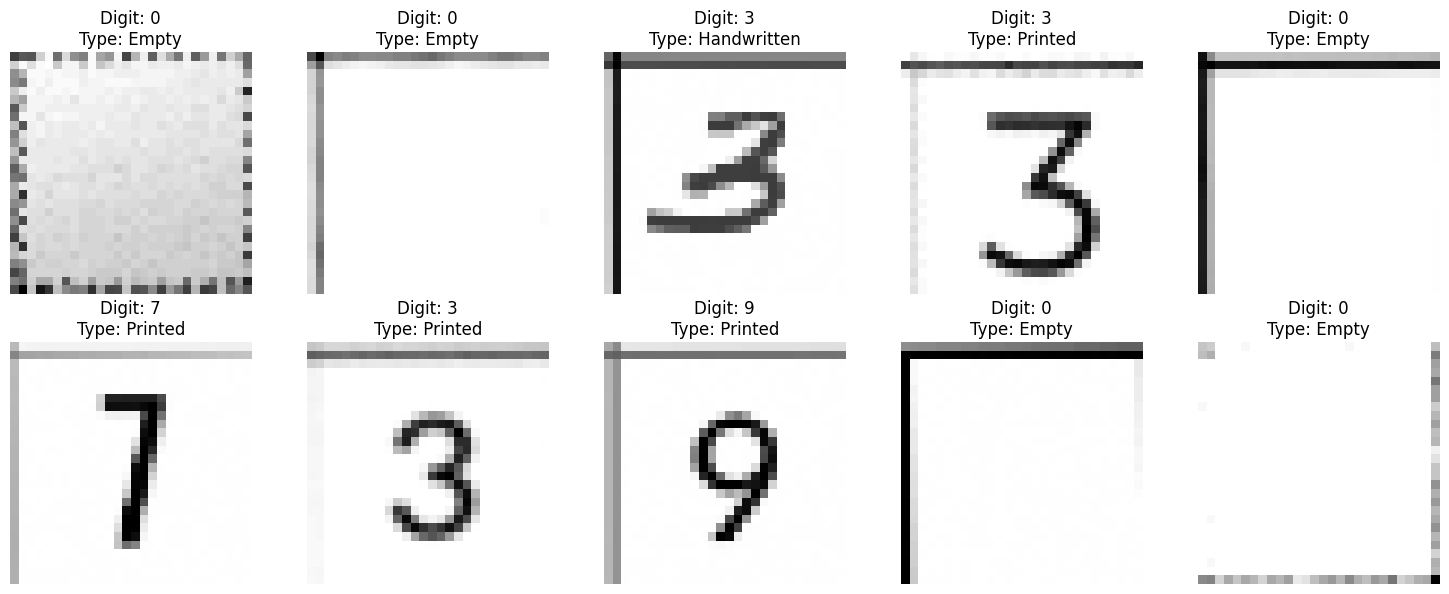

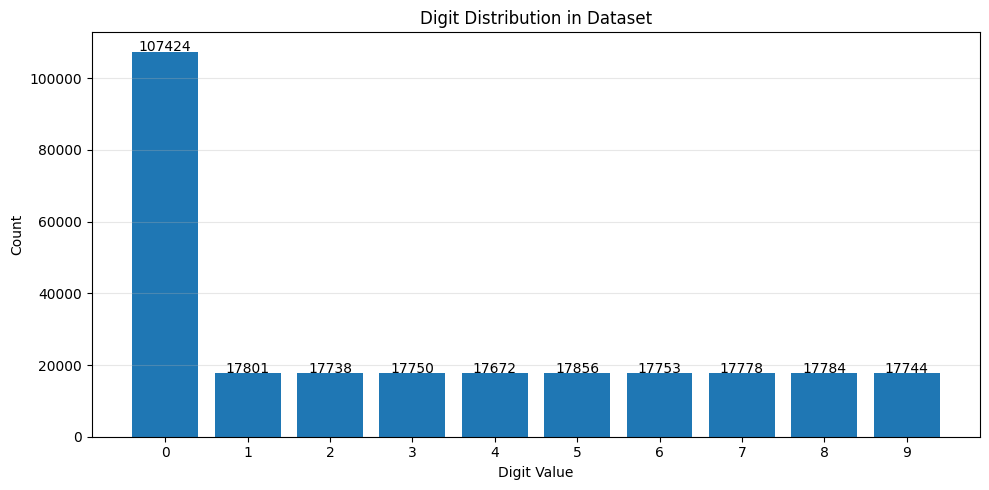

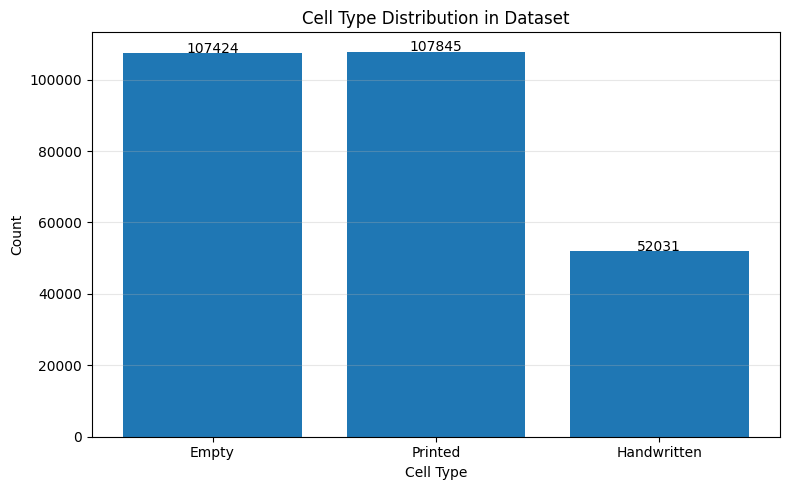

In [6]:
# Extract cells and prepare training data
datasets = experiment.prepare_data()

# Visualize the dataset
experiment.visualize_data()

## Train Models

Now let's train both digit recognition and cell type classification models.

In [7]:
# Build models
model_builder = experiment.build_models(learning_rate=0.0005)

In [9]:
# Train digit recognition models
digit_models = experiment.train_digit_models(epochs=20, batch_size=64, patience=7)

Epoch 1/20
   7/2924 [..............................] - ETA: 25s - loss: 2.2056 - accuracy: 0.2857  

2025-05-20 17:06:23.105670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2922/2924 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.8898

2025-05-20 17:06:45.907022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - 25s 8ms/step - loss: 0.4007 - accuracy: 0.8898 - val_loss: 0.1017 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 2/20
2924/2924 [==============================] - 25s 9ms/step - loss: 0.1612 - accuracy: 0.9633 - val_loss: 0.0946 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 3/20
2924/2924 [==============================] - 25s 8ms/step - loss: 0.1509 - accuracy: 0.9676 - val_loss: 0.0853 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 4/20
2924/2924 [==============================] - 26s 9ms/step - loss: 0.1580 - accuracy: 0.9685 - val_loss: 0.1045 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 5/20
2924/2924 [==============================] - 24s 8ms/step - loss: 0.1878 - accuracy: 0.9676 - val_loss: 0.1146 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 6/20
2924/2924 [==============================] - 24s 8ms/step - loss: 0.2209 - accuracy: 0.9685 - val_loss: 0.1265 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 7/20
2924/2924 [==============================] - 24s 8ms

2025-05-20 17:10:34.308295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1671/1671 [==============================] - 2s 1ms/step


Epoch 1/20


2025-05-20 17:10:37.442159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - ETA: 0s - loss: 0.1254 - accuracy: 0.9646

2025-05-20 17:11:25.708154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - 51s 17ms/step - loss: 0.1254 - accuracy: 0.9646 - val_loss: 0.0514 - val_accuracy: 0.9889 - lr: 5.0000e-04
Epoch 2/20
2924/2924 [==============================] - 50s 17ms/step - loss: 0.0447 - accuracy: 0.9884 - val_loss: 0.0660 - val_accuracy: 0.9902 - lr: 5.0000e-04
Epoch 3/20
2924/2924 [==============================] - 50s 17ms/step - loss: 0.0363 - accuracy: 0.9905 - val_loss: 0.0327 - val_accuracy: 0.9909 - lr: 5.0000e-04
Epoch 4/20
2924/2924 [==============================] - 53s 18ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.0353 - val_accuracy: 0.9912 - lr: 5.0000e-04
Epoch 5/20
2924/2924 [==============================] - 54s 19ms/step - loss: 0.0271 - accuracy: 0.9927 - val_loss: 0.0256 - val_accuracy: 0.9932 - lr: 5.0000e-04
Epoch 6/20
2924/2924 [==============================] - 54s 19ms/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0247 - val_accuracy: 0.9933 - lr: 5.0000e-04
Epoch 7/20
2924/2924 [===========

2025-05-20 17:39:52.571125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1671/1671 [==============================] - 4s 3ms/step


Epoch 1/20


2025-05-20 17:39:58.537866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9489

2025-05-20 17:41:02.599464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - 68s 23ms/step - loss: 0.1742 - accuracy: 0.9489 - val_loss: 4.6977 - val_accuracy: 0.4465 - lr: 5.0000e-04
Epoch 2/20
2924/2924 [==============================] - 66s 23ms/step - loss: 0.0468 - accuracy: 0.9886 - val_loss: 0.0323 - val_accuracy: 0.9918 - lr: 5.0000e-04
Epoch 3/20
2924/2924 [==============================] - 66s 23ms/step - loss: 0.0404 - accuracy: 0.9903 - val_loss: 0.0654 - val_accuracy: 0.9876 - lr: 5.0000e-04
Epoch 4/20
2924/2924 [==============================] - 66s 23ms/step - loss: 0.0381 - accuracy: 0.9914 - val_loss: 0.2357 - val_accuracy: 0.9871 - lr: 5.0000e-04
Epoch 5/20
2924/2924 [==============================] - 66s 23ms/step - loss: 0.0364 - accuracy: 0.9917 - val_loss: 0.1022 - val_accuracy: 0.9833 - lr: 5.0000e-04
Epoch 6/20
2924/2924 [==============================] - 67s 23ms/step - loss: 0.0342 - accuracy: 0.9925 - val_loss: 0.4401 - val_accuracy: 0.8799 - lr: 5.0000e-04
Epoch 7/20
2924/2924 [===========

2025-05-20 18:04:49.148618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1671/1671 [==============================] - 9s 5ms/step


In [10]:
# Train cell type classification models
cell_type_models = experiment.train_cell_type_models(epochs=15, batch_size=64, patience=5)

Epoch 1/15


2025-05-20 18:04:59.460728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9682

2025-05-20 18:05:28.067242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - 31s 10ms/step - loss: 0.0871 - accuracy: 0.9682 - val_loss: 0.0329 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 2/15
2924/2924 [==============================] - 30s 10ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0284 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 3/15
2924/2924 [==============================] - 30s 10ms/step - loss: 0.0309 - accuracy: 0.9911 - val_loss: 0.0356 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 4/15
2924/2924 [==============================] - 30s 10ms/step - loss: 0.0289 - accuracy: 0.9922 - val_loss: 0.0230 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 5/15
2924/2924 [==============================] - 30s 10ms/step - loss: 0.0291 - accuracy: 0.9926 - val_loss: 0.0358 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 6/15
2924/2924 [==============================] - 30s 10ms/step - loss: 0.0343 - accuracy: 0.9923 - val_loss: 0.0303 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 7/15
2924/2924 [==============================] - 3

2025-05-20 18:09:37.111297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1671/1671 [==============================] - 3s 2ms/step


Epoch 1/15


2025-05-20 18:09:41.416181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - ETA: 0s - loss: 0.0857 - accuracy: 0.9701

2025-05-20 18:10:32.281378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2924/2924 [==============================] - 53s 18ms/step - loss: 0.0857 - accuracy: 0.9701 - val_loss: 0.1496 - val_accuracy: 0.9420 - lr: 5.0000e-04
Epoch 2/15
2924/2924 [==============================] - 52s 18ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0477 - val_accuracy: 0.9925 - lr: 5.0000e-04
Epoch 3/15
2924/2924 [==============================] - 52s 18ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0183 - val_accuracy: 0.9947 - lr: 5.0000e-04
Epoch 4/15
2924/2924 [==============================] - 52s 18ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0143 - val_accuracy: 0.9948 - lr: 5.0000e-04
Epoch 5/15
2924/2924 [==============================] - 51s 17ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0171 - val_accuracy: 0.9941 - lr: 5.0000e-04
Epoch 6/15
2924/2924 [==============================] - 51s 18ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0136 - val_accuracy: 0.9953 - lr: 5.0000e-04
Epoch 7/15
2924/2924 [===========

2025-05-20 18:23:04.112835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1671/1671 [==============================] - 5s 3ms/step


## Evaluate Models

Let's evaluate our trained models and compare their performance.


Digit Recognition Model Comparison:


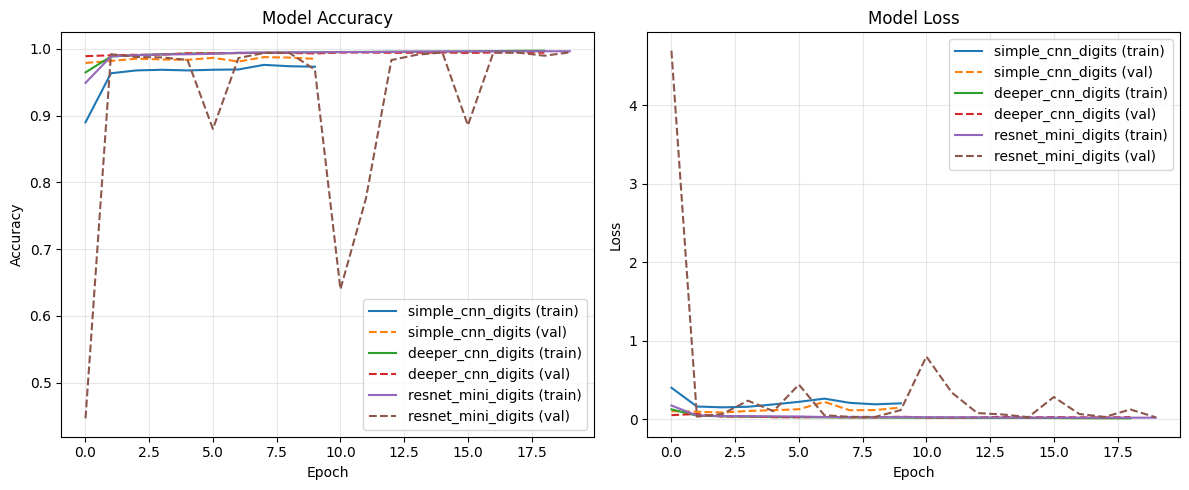

                    Model  Test Accuracy  Test Loss  F1 Score (macro)  \
0  deeper_cell_classifier       0.996932   0.009823          0.996815   
1      resnet_mini_digits       0.995380   0.023248          0.994336   
2  simple_cell_classifier       0.994800   0.019818          0.993977   
3       deeper_cnn_digits       0.994762   0.020602          0.993714   
4       simple_cnn_digits       0.986326   0.080050          0.980853   

   Precision (macro)  Recall (macro)  
0           0.997285        0.996350  
1           0.994837        0.993839  
2           0.994255        0.993701  
3           0.994656        0.992777  
4           0.981472        0.980278  


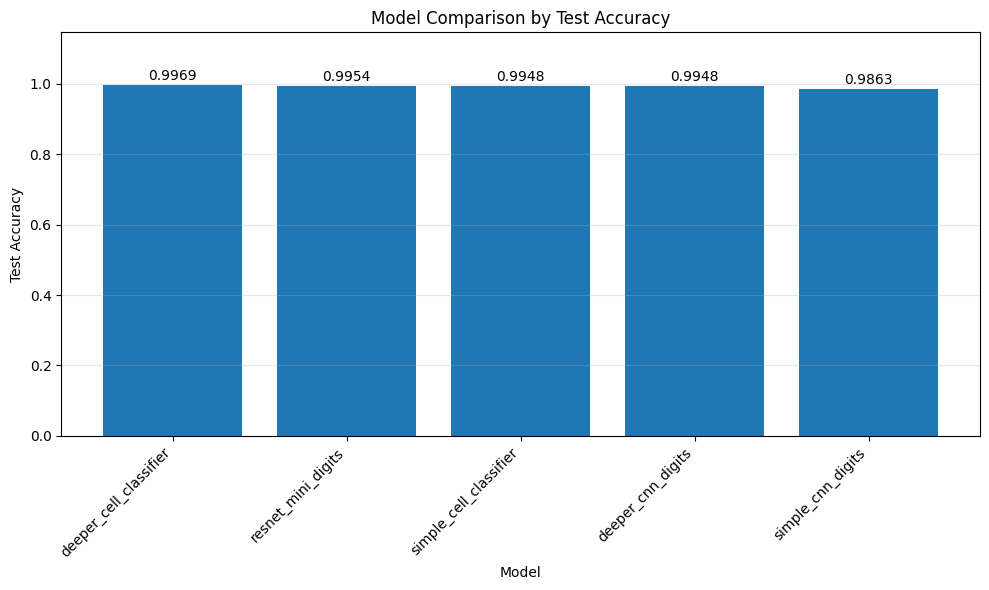

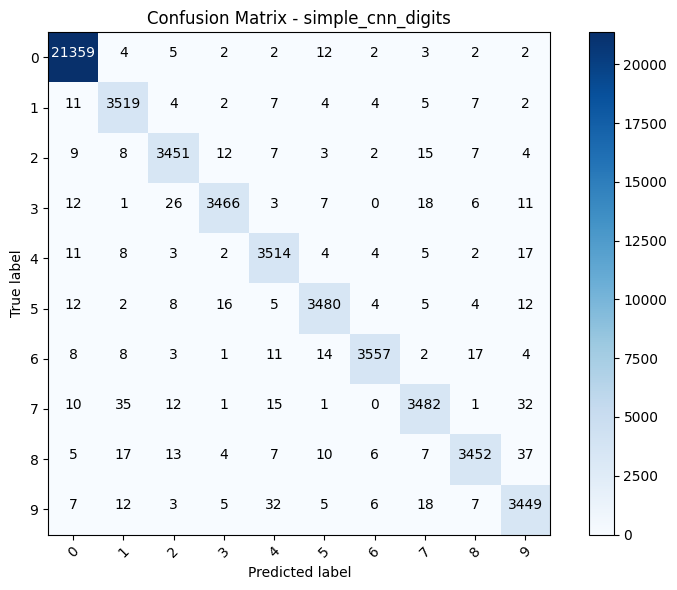

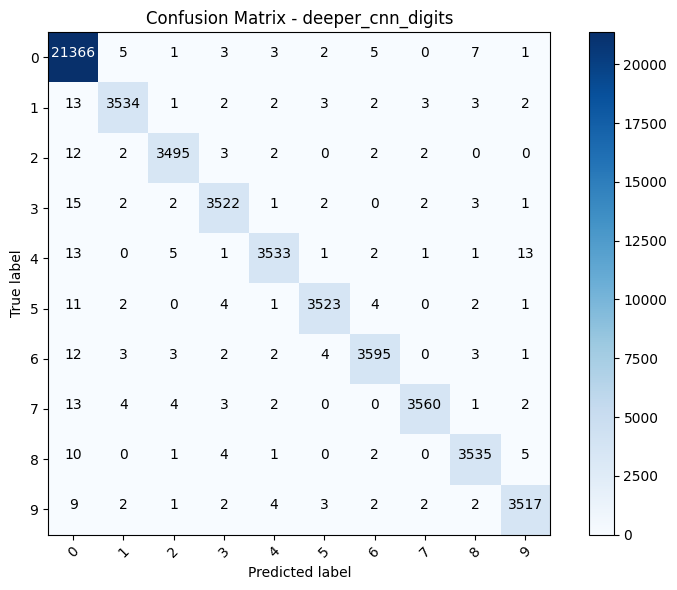

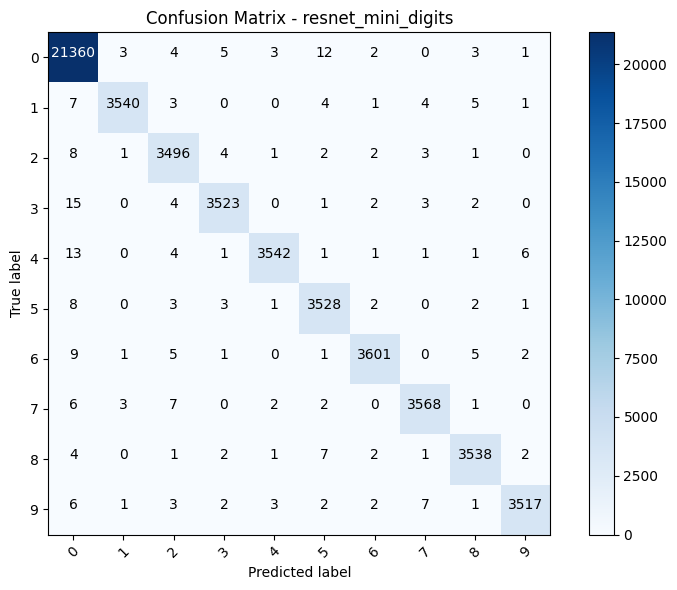

In [11]:
# Evaluate digit recognition models
digit_comparison = experiment.evaluate_digit_models()


Cell Type Classification Model Comparison:


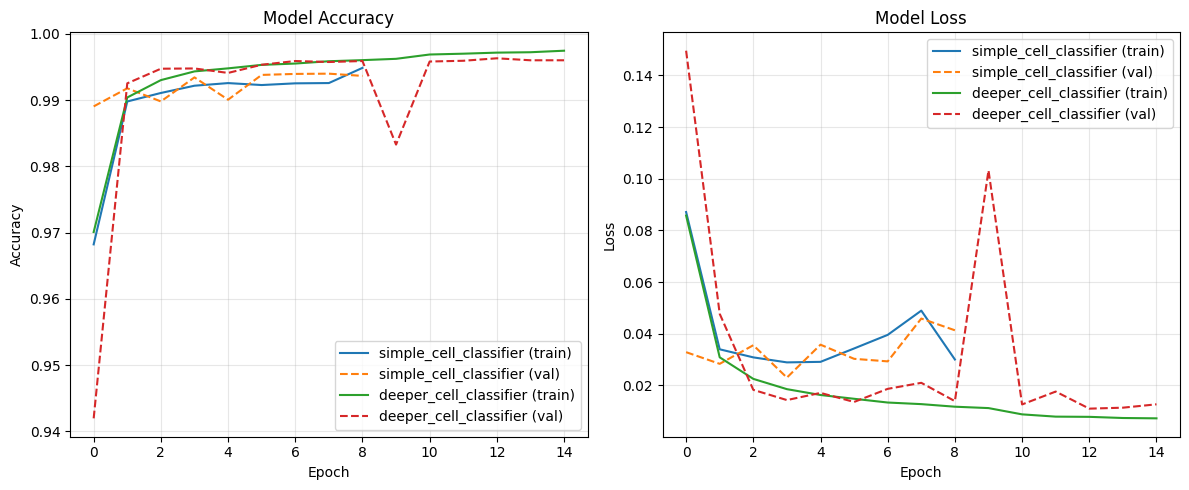

                    Model  Test Accuracy  Test Loss  F1 Score (macro)  \
0  deeper_cell_classifier       0.996932   0.009823          0.996815   
1      resnet_mini_digits       0.995380   0.023248          0.994336   
2  simple_cell_classifier       0.994800   0.019818          0.993977   
3       deeper_cnn_digits       0.994762   0.020602          0.993714   
4       simple_cnn_digits       0.986326   0.080050          0.980853   

   Precision (macro)  Recall (macro)  
0           0.997285        0.996350  
1           0.994837        0.993839  
2           0.994255        0.993701  
3           0.994656        0.992777  
4           0.981472        0.980278  


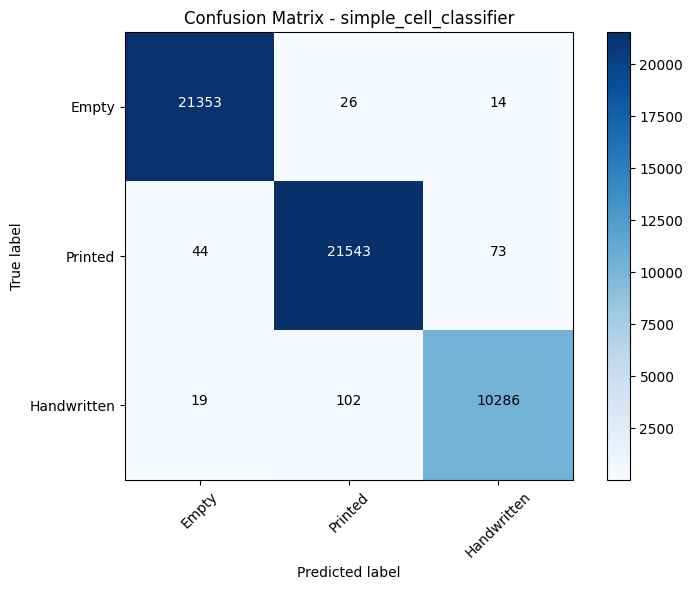

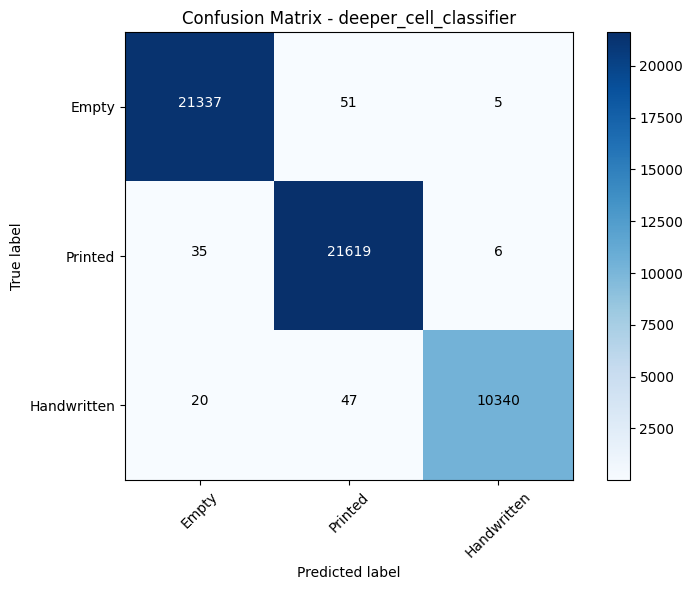

In [12]:
# Evaluate cell type classification models
cell_comparison = experiment.evaluate_cell_type_models()

## Visualize Predictions

Let's look at some of the model predictions.

1671/1671 [==============================] - 8s 5ms/step


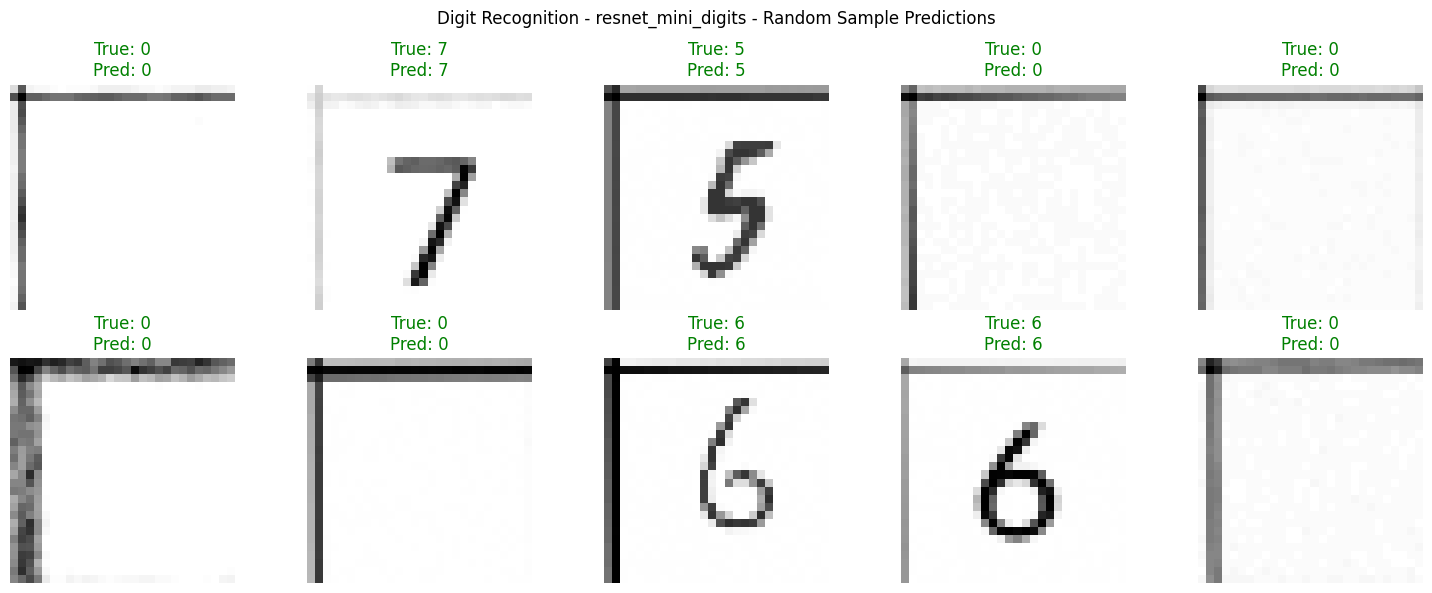

1671/1671 [==============================] - 9s 6ms/step
Found 247 incorrect predictions out of 53460 examples.


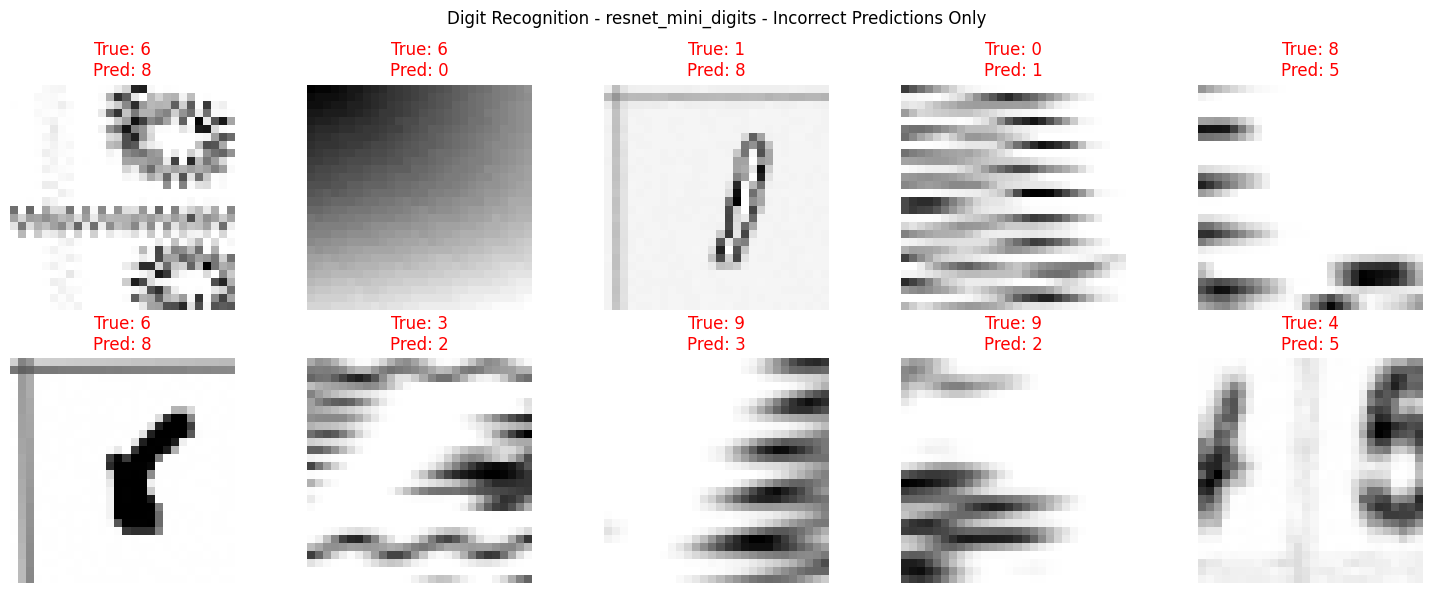

In [ ]:
# Get the best digit recognition model (based on previous evaluation)
if 'digit_models' in experiment.results:
    # Find the best model name from evaluation results
    # Only include models with "digits" in the name
    digit_models_only = [name for name in digit_comparison['Model'] if 'digits' in name]
    best_model_name = digit_models_only[0]  # Get the first (best) digit model
    best_digit_model = experiment.model_evaluator.models[best_model_name]
    
    # Get test data
    digit_test_data = experiment.datasets['digit_recognition']['test']

    # After loading the best model and before visualizing
    X_test, y_test = experiment.datasets['digit_recognition']['test']
    y_pred = best_digit_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Visualize random predictions
    visualize_predictions(
        best_digit_model,
        digit_test_data,
        class_names=[str(i) for i in range(10)],
        title=f"Digit Recognition - {best_model_name}",
        num_samples=10
    )
    
    # Visualize incorrect predictions
    visualize_predictions(
        best_digit_model,
        digit_test_data,
        class_names=[str(i) for i in range(10)],
        title=f"Digit Recognition - {best_model_name}",
        num_samples=10,
        show_errors_only=True
    )

1671/1671 [==============================] - 4s 2ms/step


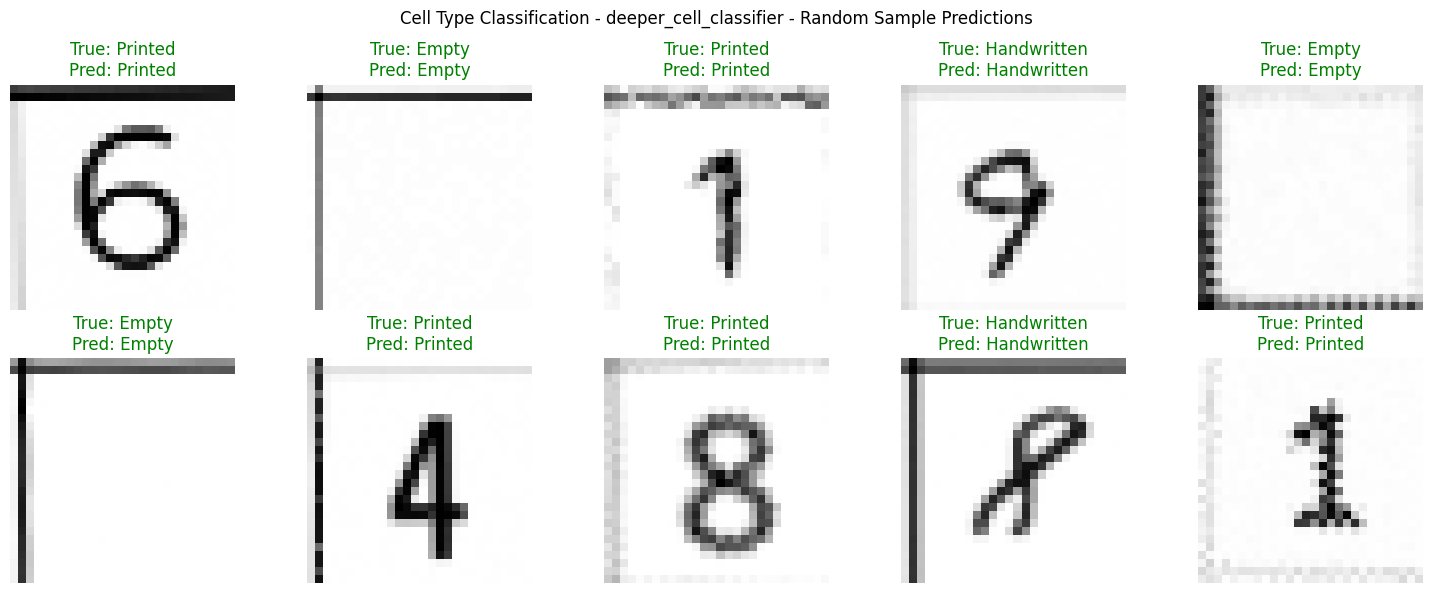

1671/1671 [==============================] - 4s 2ms/step
Found 164 incorrect predictions out of 53460 examples.


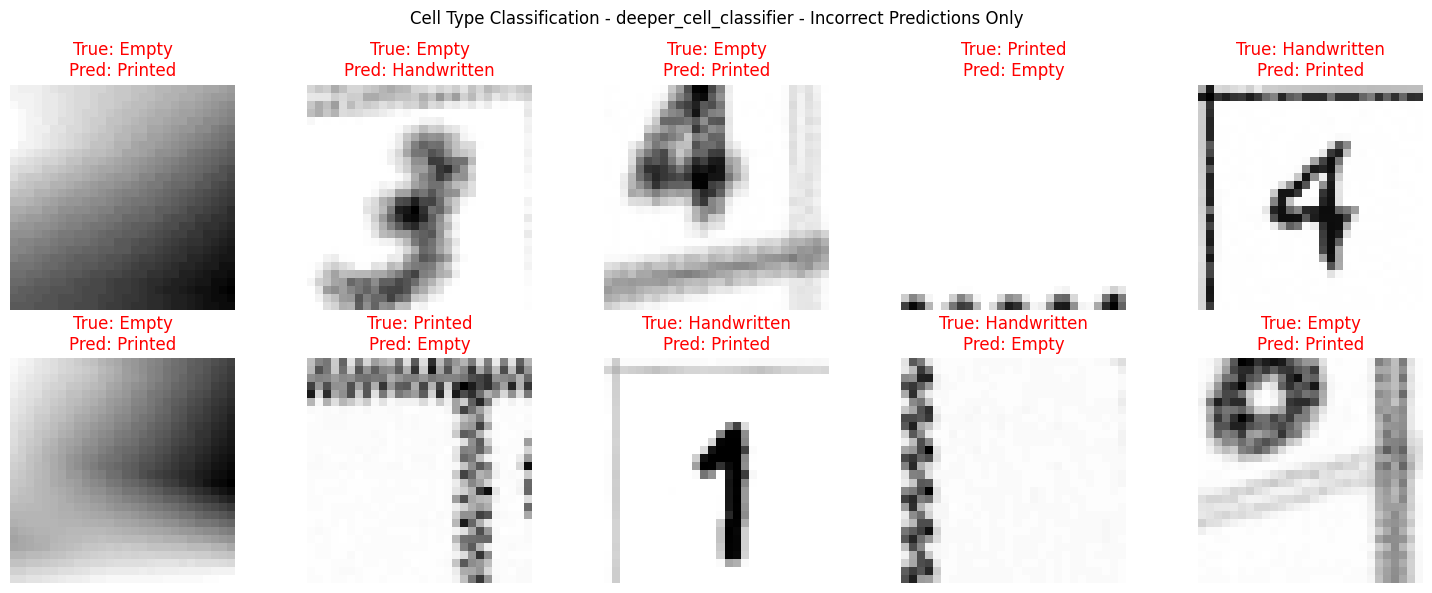

In [14]:
# Get the best cell type classification model
if 'cell_type_models' in experiment.results:
    # Find the best model name from evaluation results
    best_cell_model_name = cell_comparison.iloc[0]['Model']
    best_cell_model = experiment.model_evaluator.models[best_cell_model_name]
    
    # Get test data
    cell_test_data = experiment.datasets['cell_type_classification']['test']
    
    # Visualize random predictions
    visualize_predictions(
        best_cell_model,
        cell_test_data,
        class_names=['Empty', 'Printed', 'Handwritten'],
        title=f"Cell Type Classification - {best_cell_model_name}",
        num_samples=10
    )
    
    # Visualize incorrect predictions
    visualize_predictions(
        best_cell_model,
        cell_test_data,
        class_names=['Empty', 'Printed', 'Handwritten'],
        title=f"Cell Type Classification - {best_cell_model_name}",
        num_samples=10,
        show_errors_only=True
    )

## Save Models

Let's save our best models for future use.

In [15]:
from src.utils import save_model

# Save the best digit recognition model
if 'digit_models' in experiment.results:
    digit_model_path = save_model(best_digit_model, best_model_name)
    print(f"Digit model saved to: {digit_model_path}")
    
    # Save the best cell type classification model
    cell_model_path = save_model(best_cell_model, best_cell_model_name)
    print(f"Cell type model saved to: {cell_model_path}")

Model saved to /Users/matt/development/sudoku-ai/models/resnet_mini_digits.h5
Digit model saved to: /Users/matt/development/sudoku-ai/models/resnet_mini_digits.h5
Model saved to /Users/matt/development/sudoku-ai/models/deeper_cell_classifier.h5
Cell type model saved to: /Users/matt/development/sudoku-ai/models/deeper_cell_classifier.h5


/Users/matt/development/sudoku-ai/sudoku-env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1671/1671 [==============================] - 4s 3ms/step


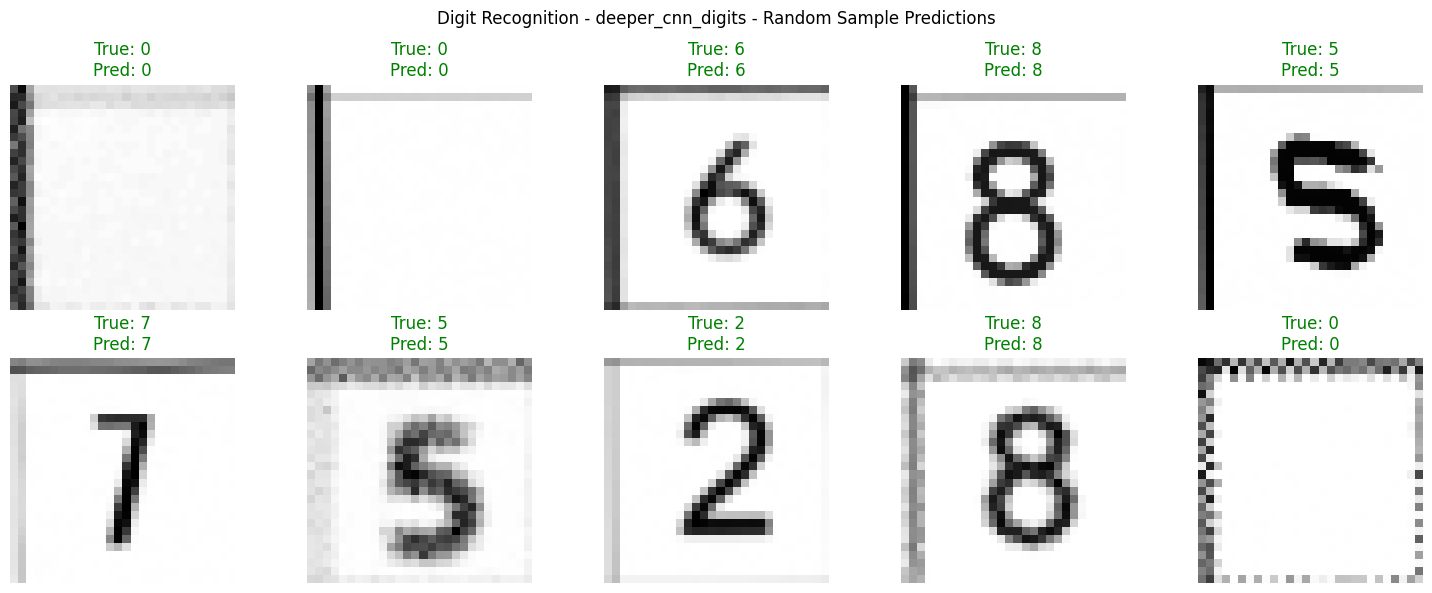

1671/1671 [==============================] - 4s 3ms/step
Found 280 incorrect predictions out of 53460 examples.


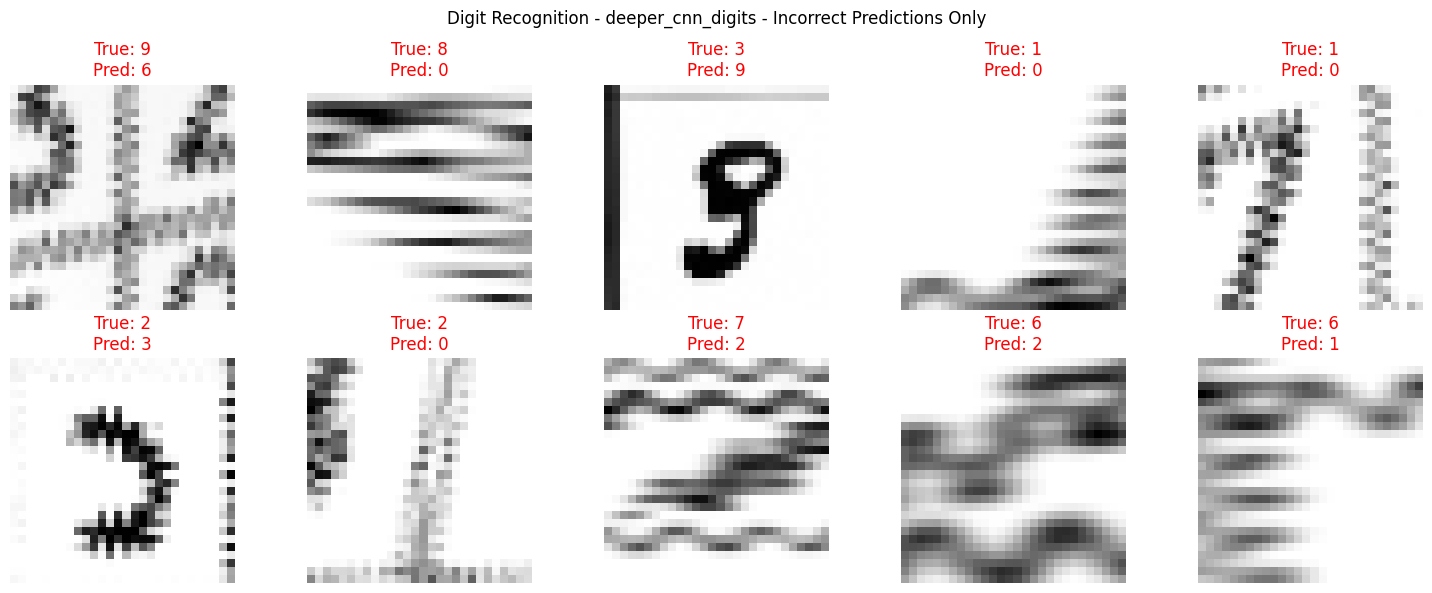

Model saved to /Users/matt/development/sudoku-ai/models/deeper_cnn_digits.h5
Digit model saved to: /Users/matt/development/sudoku-ai/models/deeper_cnn_digits.h5


In [17]:
# Get the best digit recognition model (based on previous evaluation)
if 'digit_models' in experiment.results:
    # Find the best model name from evaluation results
    # Only include models with "digits" in the name
    digit_models_only = [name for name in digit_comparison['Model'] if 'digits' in name]
    best_model_name = digit_models_only[1]  # Get the first (best) digit model
    best_digit_model = experiment.model_evaluator.models[best_model_name]
    
    # Get test data
    digit_test_data = experiment.datasets['digit_recognition']['test']

    # After loading the best model and before visualizing
    X_test, y_test = experiment.datasets['digit_recognition']['test']
    y_pred = best_digit_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Visualize random predictions
    visualize_predictions(
        best_digit_model,
        digit_test_data,
        class_names=[str(i) for i in range(10)],
        title=f"Digit Recognition - {best_model_name}",
        num_samples=10
    )
    
    # Visualize incorrect predictions
    visualize_predictions(
        best_digit_model,
        digit_test_data,
        class_names=[str(i) for i in range(10)],
        title=f"Digit Recognition - {best_model_name}",
        num_samples=10,
        show_errors_only=True
    )

    digit_model_path = save_model(best_digit_model, best_model_name)
    print(f"Digit model saved to: {digit_model_path}")

## Load and Test Saved Models

Let's verify that we can load the saved models and use them for inference.

1/1 [==============================] - 0s 97ms/step


2025-05-20 18:23:48.156066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


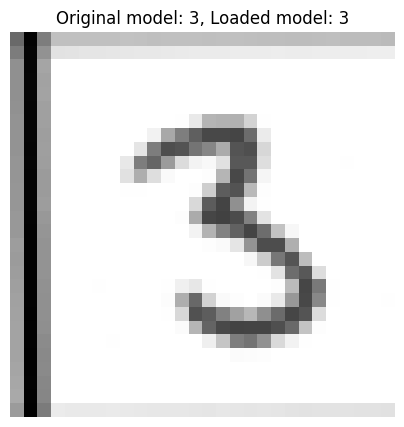

Original model prediction: 3
Loaded model prediction: 3
Predictions match: True


In [16]:
from src.utils import load_model

# Load the saved models
loaded_digit_model = load_model(best_model_name)
loaded_cell_model = load_model(best_cell_model_name)

# Verify that the loaded models work
# Get a single test sample
x_test, y_test = digit_test_data
x_sample = x_test[0:1]  # Get just one sample

# Make predictions with both original and loaded models
original_pred = np.argmax(best_digit_model.predict(x_sample), axis=1)[0]
loaded_pred = np.argmax(loaded_digit_model.predict(x_sample), axis=1)[0]

# Display the results
plt.figure(figsize=(5, 5))
plt.imshow(x_sample[0, :, :, 0], cmap='gray')
plt.title(f"Original model: {original_pred}, Loaded model: {loaded_pred}")
plt.axis('off')
plt.show()

print(f"Original model prediction: {original_pred}")
print(f"Loaded model prediction: {loaded_pred}")
print(f"Predictions match: {original_pred == loaded_pred}")

## Conclusion

In this notebook, we've demonstrated the process of:
1. Loading and preparing Sudoku image data
2. Training digit recognition and cell type classification models
3. Evaluating and comparing model performance
4. Saving and loading models for reuse

These models can now be incorporated into a complete Sudoku solver pipeline that takes an image of a Sudoku puzzle, detects the board, extracts the cells, recognizes the digits, and solves the puzzle.